## Data preparation

Use the same data set and model from previous lesson

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:\\Users\\Geral\\Desktop\\VSCODE\\ml_zoomcamp\\03_classification\\Telco.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data pre-processing

- Column names consistent

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

- Get the categorical features

In [5]:
categorical = list(df.dtypes[df.dtypes == object].index)

- Make the variables in categorical columns consistent

In [6]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(" ", "_")

- Change the column totalcharges to numeric

In [7]:
df.totalcharges = pd.to_numeric(df["totalcharges"], errors = "coerce")

- Fill the missing values with 0

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]

totalcharges    11
dtype: int64

In [9]:
df.totalcharges = df.totalcharges.fillna(0)

- Change the column churn to integer

In [10]:
df["churn"] = (df["churn"] == "yes").astype(int)

In [11]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


### Model - Logistic Regression

- Split the data set

In [12]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [13]:
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 1)

- Reset the indexes

In [14]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

- Get the y vectors and delete the target variable from the data sets

In [15]:
y_train = df_train["churn"]
y_val = df_val["churn"]
y_test = df_test["churn"]

In [16]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

- Get a list of numerical and categorical columns. Get the customerid out of the categorical list

In [17]:
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [18]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

- Convert the train to dictionary

In [19]:
train_dicts = df_train[categorical + numerical].to_dict(orient = "records")

- Get the feature matrix

In [20]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

- Convert the validation set to a dictionary and get the matrix

In [21]:
val_dicts = df_val[categorical+numerical].to_dict(orient = "records")
X_val = dv.transform(val_dicts)

- Train the model

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

- Apply and get the predictions

In [23]:
y_pred = model.predict_proba(X_val)[:,1]

- Evaluate the accuracy based on a churn_decision value

In [24]:
churn_decision = (y_pred > 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## Accuracy and Dummy model

**Accuracy**: measures the fraction of correct predictions. Divides the number of correct predictions by the total number of predictions.

In [25]:
len(y_val)

1409

For each customer, we assign a score and based on a threshold we see how many decisions were correct

In [26]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [27]:
(y_val == churn_decision).sum()

1132

**Accuracy** = Correct Prediction / All Predictions

In [28]:
(y_val == churn_decision).sum() / len(y_val)

0.8034066713981547

- The decision took in account a threshold of 0,5. Is this a good threshold?

- Test different thresholds

In [29]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [30]:
scores = []

for t in thresholds:
    churn_decision = (y_pred > t)
    score = (y_val == churn_decision).mean()
    
    print(f"threshold: {t:.2f}, score: {score:.3f}")
    scores.append(score)

threshold: 0.00, score: 0.274
threshold: 0.05, score: 0.509
threshold: 0.10, score: 0.591
threshold: 0.15, score: 0.666
threshold: 0.20, score: 0.710
threshold: 0.25, score: 0.739
threshold: 0.30, score: 0.760
threshold: 0.35, score: 0.772
threshold: 0.40, score: 0.785
threshold: 0.45, score: 0.793
threshold: 0.50, score: 0.803
threshold: 0.55, score: 0.801
threshold: 0.60, score: 0.795
threshold: 0.65, score: 0.786
threshold: 0.70, score: 0.766
threshold: 0.75, score: 0.744
threshold: 0.80, score: 0.735
threshold: 0.85, score: 0.726
threshold: 0.90, score: 0.726
threshold: 0.95, score: 0.726
threshold: 1.00, score: 0.726


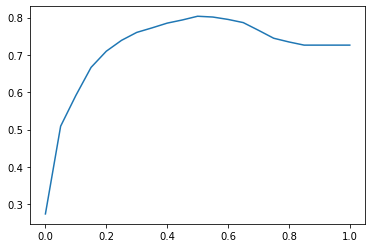

In [31]:
plt.plot(thresholds, scores)

- We can see that 0,5 is indeed the best threshold

- Scikit-learn has a function to compute the accuracy

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_val, (y_pred > 0.5))

0.8034066713981547

Special cases:
- **Threshold = 1**: Predict that no customer is churning. For this case (Dummy Model), the accuracy is ~73%

- **Threshold = 0**: Predict that all customers are churning. Here, the model gives an accuracy of 80%.

- Our model has an accuracy of 80% and the Dummy Model is just 7% lower. Why bother? 

In [34]:
from collections import Counter

In [35]:
Counter(y_val)

Counter({0: 1023, 1: 386})

Because accuracy does not handle well with imbalance data. In these cases, the accuracy is not a quality metric to evaluate the model.

## Confusion matrix

In [36]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [37]:
tp = (predict_positive & actual_positive).sum()
tp

210

In [38]:
tn = (predict_negative & actual_negative).sum()
tn

922

**Error cases:**

- False Positives (Type I Error): Predicted positive but they belong to the negative class  

In [39]:
fp = (predict_positive & actual_negative).sum()
fp
1

1

Clients that received a discount but they are not churning. Money lost

- False Negatives (Type II Error): Predicted negative but they belong to the positive class

In [40]:
fn = (predict_negative & actual_positive).sum()
fn

176

Customers that did not receive a discount and left the company

In [41]:
confusion_matrix = np.array([
                        [tn, fp],
                        [fn, tp]])
confusion_matrix

array([[922, 101],
       [176, 210]], dtype=int64)

Confusion matrix in relative numbers:

In [42]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

**Accuracy** = (TN + TP) / Total

## Precision and Recall

**Precision**: Fraction of positive predictions that were indeed correct.

- From th predicted customers that were going to churn, which one were in fact correct


**Precision** = TP / (TP + FP)

In [43]:
p = tp / (tp + fp)
p

0.6752411575562701

Approximately 33% are errors. Customers that were not suppose to receive an e-mail but still received, although they are not going to churn.

**Recall**: Fraction of positive observations that were identified correctly,

- Looking at the customers that in fact did churn, which part was correctly identified

**Recall** = TP / (TP + FN)

In [44]:
r = tp / (tp + fn)
r

0.5440414507772021

46% of the customers who are churning, were not identified.

Metrics:
- Accuracy = 80%
- Recall = 54%
- Precision = 67%

With an Accuracy of 80%, the model appears tobe a good one, but looking at both Precision and Recall the model missed to identify 
46% churning customers and send a promotion e-mail to 33% of the users tha were not churning, costing money to the company.

---

## ROC Curve

ROC Curve describes the performance of a binary classification model.

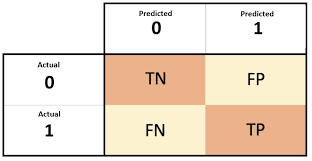

**False Positive Rate (FPR)** = FP / (TN + FP)

- Fraction of False Positives over the total number of negative observations.

- We want the **FRP** to be the **lowest** as possible, we want to minimize the number of **FP**.

**True Positive Rate (TPR)** = TP / (FN + TP)

- Fraction of True Positives over the total number of positive observations (RECALL).

- We want the **TPR** to be the **highest** as possible, we want to maximize the number of **TP**. 

In [45]:
tpr = tp / (fn + tp)
tpr

0.5440414507772021

In [46]:
fpr = fp / (tn + fp)
fpr

0.09872922776148582

- A **FPR** of 9.8% tells us that for all negative observations, approximately 10% of those are still predicted incorrectly

The ROC Curve will evaluate these results for different thresholds

In [47]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [49]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

- Put the score ins a dataframe

In [50]:
columns = ["threshold", "tp", "fp", "fn", "tn"]

df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308


In [51]:
df_scores["tpr"] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp/(df_scores.fp + df_scores.tn)

In [52]:
df_scores.head()

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925


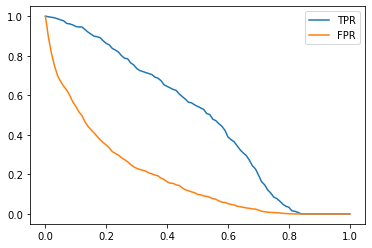

In [53]:
plt.plot(df_scores["threshold"], df_scores["tpr"], label="TPR")
plt.plot(df_scores["threshold"], df_scores["fpr"], label="FPR")
plt.legend()

For a threshold = 0 we have both TPR = FPR = 1. It is the dumy model, that predicts everyone is churning.

- TPR = 1, because all positive customers are identify corretly

- FPR = 1, because all non-churn customers were predict incorrectly as churn

This plot does not tell much because it lacks a comparision, a baseline. Let's look at a Random Model Baseline and an Ideal Model Baseline

- **Random Model**

It works like a flip of a coin (Churn/Non-Churn) to decide the fate of a customer

In [54]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

Accuracy of a random model

In [55]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [56]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns =["threshold", "tp", "fp", "fn", "tn"]
    df_scores = pd.DataFrame(scores, columns=columns)
        
    df_scores["tpr"] = df_scores.tp/(df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp/(df_scores.fp + df_scores.tn)
    
    return df_scores

In [57]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

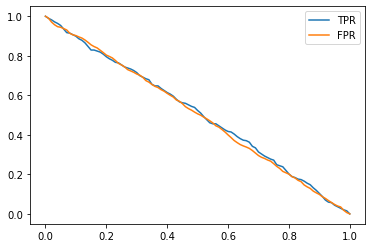

In [58]:
plt.plot(df_rand["threshold"], df_rand["tpr"], label="TPR")
plt.plot(df_rand["threshold"], df_rand["fpr"], label="FPR")
plt.legend()

In 60% of the cases (x-axis is the threshold), the model predicts the customer is not going to churn and in 40% of the cases it predicts that the customer is churning. In 40% of the cases it is incorrect for customer that did not churn.

- **Ideal Model**

All the predictions are correct in this model.

The model orders customers by their score in a way that first we will have all the customers that are not churning and them all the ones that are churning.

Given a certain threshold, all the predictions will be correct

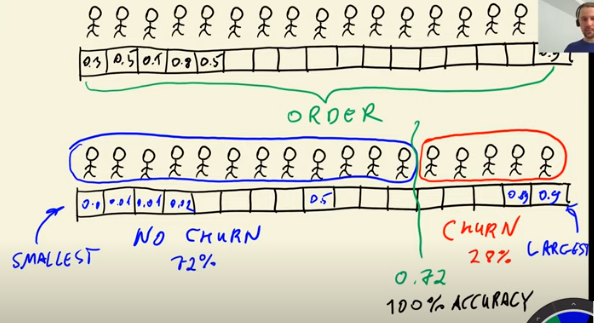

- First, we need to know the number of negative examples

In [59]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

- Create an ideal validation data set, first with negative observations and then the positives

In [60]:
y_ideal = np.repeat([0,1],[num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

- Create predictions

In [61]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

- Accuracy

In [62]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [63]:
df_ideal =  tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [64]:
df_ideal.head()

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.0,1.000000
1,0.01,386,1008,0,15,1.0,0.985337
2,0.02,386,994,0,29,1.0,0.971652
3,0.03,386,980,0,43,1.0,0.957967
4,0.04,386,966,0,57,1.0,0.944282


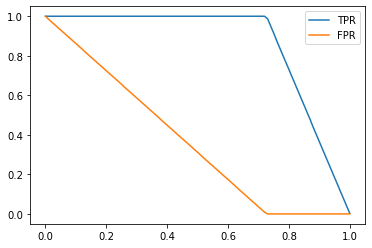

In [65]:
plt.plot(df_ideal["threshold"], df_ideal["tpr"], label="TPR")
plt.plot(df_ideal["threshold"], df_ideal["fpr"], label="FPR")
plt.legend()

- TPR is maximized and FPR is minimized for this threshold.

- Such an ideal moel does not exist in reality, but it helps us to see how good our model is.

- **Plot all the benchmarks**

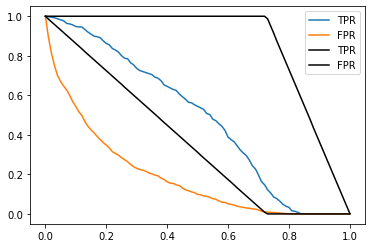

In [66]:
plt.plot(df_scores["threshold"], df_scores["tpr"], label="TPR")
plt.plot(df_scores["threshold"], df_scores["fpr"], label="FPR")

#plt.plot(df_rand["threshold"], df_rand["tpr"], label="TPR")
#plt.plot(df_rand["threshold"], df_rand["fpr"], label="FPR")

plt.plot(df_ideal["threshold"], df_ideal["tpr"], label="TPR", color="black")
plt.plot(df_ideal["threshold"], df_ideal["fpr"], label="FPR", color="black")
plt.legend()

Plot against thresholds is not always intuitive. Another comparison can be done between TPR and FPR

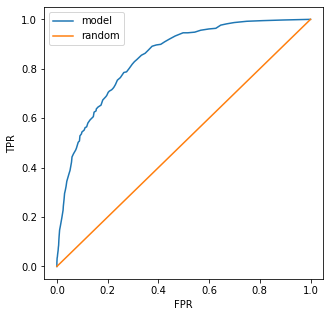

In [67]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot([0, 1], [0,1], label="random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

- FPR = 0 & TPR = 0

For all customers, we predict that they were not going to churn.
TPR = 0, because we did not predcit any customer as churn.
FPR = 0, because they are not any FP, only TN.

- FPR = 1 & TPR = 1

Predict all as churning.
TPR = 1, we predict all as churn but some mistakes were made (FPR = 1).

- FPR > 0 & TPR > 0

We start to predict some customers as churn. 
The FPR starts to increase because we are making some mistakes.
The TPR increases because some decisions are correct.
We deviate from the ideal scenario.

**We can uses sklearn to plot the ROC curve**

In [68]:
from sklearn.metrics import roc_curve

In [70]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

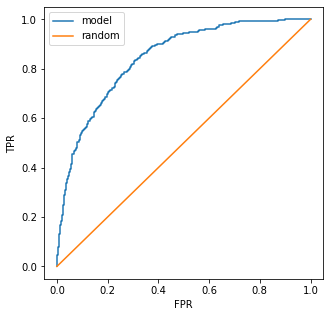

In [71]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label="model")
plt.plot([0, 1], [0,1], label="random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

## ROC AUC

In [72]:
from sklearn.metrics import auc

In [73]:
auc(fpr, tpr)

0.843850505725819

In [74]:
# for our manually calculates scores
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [75]:
# for the ideal model
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

This calculation can also be done in one step, directly from the validations and predictions

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_val, y_pred)

0.843850505725819

The code above is a shortcut for:

In [79]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.843850505725819

**AUC Interpretation**

After the scores have been assigned to each customer, the AUC tells us what is the probability of a randomly selected individual from the positive class has a higher score than a randomly selected individual from the negative class.

In [80]:
# scores for negative samples
neg = y_pred[y_val==0]
# scores for positive samples
pos = y_pred[y_val==1]

In [81]:
# randomly select a positive sample
import random

pos_ind = random.randint(0, len(pos) -1)
neg_ind = random.randint(0, len(neg) -1)

In [83]:
# compare the scores of the positive and negative sample
pos[pos_ind] > neg[neg_ind]

True

In [84]:
# Do this many times ...
n = 10000
success = 0
for i in range(n):
    pos_ind = random.randint(0, len(pos) -1)
    neg_ind = random.randint(0, len(neg) -1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success += 1
        
success/n

0.8423

In [85]:
# alternative vectorized implementation
n = 50000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [86]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.84486

## Cross-validation

- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [87]:
# train a model
def train(df, y_train):
    dicts = df[categorical + numerical].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train, y_train)
    
    return dv, model

In [88]:
dv, model = train(df_train, y_train)

In [89]:
# make predictions 
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

To do the k-fold split we can use sklearn

In [91]:
!pip install tqdm

In [92]:
from sklearn.model_selection import KFold

In [93]:
from tqdm.auto import tqdm

In [94]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

kfold.split(df_train_full) generates an iterator with indices for training and validation

In [95]:
train_idx, val_idx = next(kfold.split(df_train_full))

In [96]:
print(f"full data length: {len(df_train_full)}, train data length: {len(train_idx)}, validation data length {len(val_idx)}")

full data length: 5634, train data length: 5070, validation data length 564


In [97]:
# Loop through different folds
scores = []
for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    roc_auc = roc_auc_score(y_val, y_pred)
    scores.append(roc_auc)

0it [00:00, ?it/s]

In [98]:
scores

[0.8493392490816277,
 0.8413366336633662,
 0.8590269587894291,
 0.8330260883877869,
 0.8242710918114144,
 0.840959040959041,
 0.8437154021491371,
 0.8223513598987982,
 0.8450570623981029,
 0.8611811367685119]

In [99]:
print(f"mean auc: {np.mean(scores):.3f}, spread: {np.std(scores)*100:.3}%")

mean auc: 0.842, spread: 1.23%


- In logisgtic regression a regularization parameter "C" can be included
- We can then test different regularization paramters

In [100]:
# train a model
def train2(df, y_train, C=1.0):
    dicts = df[categorical + numerical].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver="liblinear", C=C)#, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [101]:
# Loop through different folds
n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]: 
    scores = []
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    for train_idx, val_idx in tqdm(kfold.split(df_train_full), total=n_splits):
        
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train2(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        roc_auc = roc_auc_score(y_val, y_pred)
        scores.append(roc_auc)
    
    print(f"Regularization parameter C: {C}")    
    print(f"mean auc: {np.mean(scores):.3f}, spread: {np.std(scores)*100:.3}%")

  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 0.001
mean auc: 0.825, spread: 1.31%


  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 0.01
mean auc: 0.839, spread: 0.878%


  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 0.1
mean auc: 0.841, spread: 0.748%


  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 0.5
mean auc: 0.841, spread: 0.74%


  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 1
mean auc: 0.841, spread: 0.739%


  0%|          | 0/5 [00:00<?, ?it/s]

Regularization parameter C: 10
mean auc: 0.841, spread: 0.751%


- Train the final model

In [102]:
dv, model = train2(df_train_full, df_train_full.churn.values, C=1)
y_pred = predict(df_test, dv, model)
    
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.8579400803839363